In [3]:
import FPCAnalysis
import numpy as np

In [4]:
#load everything we need
#-----------------------

path = '/home/crbrown/M06_th45/'
numframe = 2000
inputs = FPCAnalysis.ddhr.read_input(path=path)

#load the fields data
dfields = FPCAnalysis.ddhr.field_loader(path=path,num=numframe)
dfields.keys()

#load the density data
dden = FPCAnalysis.ddhr.den_loader(path=path,num=numframe)
dden.keys()

dict_keys(['den', 'den_xx', 'den_yy', 'den_zz', 'Vframe_relative_to_sim'])

In [15]:
def plot_3d_fields(dfields,fieldkey,viewangle,flnm='',cutoffval=None,cutofflocation=None,smin = .15):
    #Let's plot the fields in the the 3D!
    #Note, we are in the simulation rest frame
    #This is *like* (again we are in the sim frame here) Figure 3C of Juno et al 2023
    #------------------------------------------

    import matplotlib.pyplot as plt
    from mpl_toolkits import mplot3d

    ax = plt.axes(projection='3d')

    plt.gcf().set_size_inches(16, 9)

    plt.style.use('cb.mplstyle')

    x3d = []
    y3d = []
    z3d = []
    c3d = []
    s3d = []
    for _iidx in range(len(dfields[fieldkey+'_zz'])):
        for _jidx in range(len(dfields[fieldkey+'_yy'])):
            for _kidx in range(len(dfields[fieldkey+'_xx'])):
                if(cutofflocation != None and cutoffval != None):
                    if(np.abs(dfields[fieldkey+'_xx'][_kidx])<cutofflocation and np.abs(dfields[fieldkey][_iidx,_jidx,_kidx])>cutoffval):
                        x3d.append(dfields[fieldkey+'_xx'][_kidx])
                        y3d.append(dfields[fieldkey+'_yy'][_jidx])
                        z3d.append(dfields[fieldkey+'_zz'][_iidx])
                        c3d.append(dfields[fieldkey][_iidx,_jidx,_kidx])
                        s3d.append(smin*10*np.abs(dfields[fieldkey][_iidx,_jidx,_kidx])**2.+smin)
                elif(cutofflocation != None):
                    if(np.abs(dfields[fieldkey+'_xx'][_kidx])<cutofflocation):
                        x3d.append(dfields[fieldkey+'_xx'][_kidx])
                        y3d.append(dfields[fieldkey+'_yy'][_jidx])
                        z3d.append(dfields[fieldkey+'_zz'][_iidx])
                        c3d.append(dfields[fieldkey][_iidx,_jidx,_kidx])
                        s3d.append(smin*10*np.abs(dfields[fieldkey][_iidx,_jidx,_kidx])**2.+smin)
                    
                elif(cutoffval != None):
                    if(np.abs(dfields[fieldkey][_iidx,_jidx,_kidx])>cutoffval):
                        x3d.append(dfields[fieldkey+'_xx'][_kidx])
                        y3d.append(dfields[fieldkey+'_yy'][_jidx])
                        z3d.append(dfields[fieldkey+'_zz'][_iidx])
                        c3d.append(dfields[fieldkey][_iidx,_jidx,_kidx])
                        s3d.append(smin*10*np.abs(dfields[fieldkey][_iidx,_jidx,_kidx])**2.+smin)  
                else:
                    x3d.append(dfields[fieldkey+'_xx'][_kidx])
                    y3d.append(dfields[fieldkey+'_yy'][_jidx])
                    z3d.append(dfields[fieldkey+'_zz'][_iidx])
                    c3d.append(dfields[fieldkey][_iidx,_jidx,_kidx])
                    s3d.append(smin*10*np.abs(dfields[fieldkey][_iidx,_jidx,_kidx])**2.+smin)

    vmax = np.max(np.abs(c3d))
    im = ax.scatter3D(x3d,y3d,z3d,c=c3d,cmap='inferno',alpha = 1,vmin=0,vmax=vmax,s=s3d)

    # make the side panels transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo["grid"]['color'] =  (0,0,0,1) #rgb alpha
    ax.yaxis._axinfo["grid"]['color'] =  (0,0,0,1)
    ax.zaxis._axinfo["grid"]['color'] =  (0,0,0,1)
    ax.set_xlabel('$x / d_i$', size = 16,labelpad=15)
    ax.set_ylabel('$y / d_i$', size = 16,labelpad=10)
    ax.set_zlabel('$z / d_i$', size = 16)

    ax.set_xlim(np.min(dfields['ex_xx']),np.max(dfields['ex_xx']))

    #make aspect ratio equal to simulation size
    xaspect = dfields[fieldkey+'_xx'][-1]-dfields[fieldkey+'_xx'][0]
    yaspect = dfields[fieldkey+'_yy'][-1]-dfields[fieldkey+'_yy'][0]
    zaspect = dfields[fieldkey+'_zz'][-1]-dfields[fieldkey+'_zz'][0]
    ax.set_box_aspect(aspect = (xaspect,yaspect,zaspect))

    if(viewangle == 'angle6'):
        print("moving x axis label...")
        ax.xaxis.labelpad=45
    try:
        ax.set_aspect('equal')
    except:
        pass
    
    if(viewangle == 'angle6'):
        print("shrinking cbar...")
        cbar = plt.colorbar(im,shrink=0.5)
    else:
        cbar = plt.colorbar(im)
        
    #TODO: add all field labels here
    if(fieldkey == 'by'):
        cbar.set_label('$B_y(x,y,z)$', rotation=270)
    if(fieldkey == 'bz'):
        cbar.set_label('$B_z(x,y,z)$', rotation=270,labelpad=17, size = 16)

    cbar.set_alpha(1)
    cbar.solids.set_rasterized(True)
    cbar.solids.set_edgecolor("face")
    if(viewangle == 'angle1'):
        ax.view_init(elev=0, azim=0)
    if(viewangle == 'angle2'):
        ax.view_init(elev=45, azim=45)
    if(viewangle == 'angle3'):
        ax.view_init(elev=90, azim=90)
    if(viewangle == 'angle4'):
        ax.view_init(elev=0, azim=90)
    if(viewangle == 'angle5'):
        ax.view_init(elev=90, azim=0)
    if(viewangle == 'angle6'):
        ax.view_init(elev=20, azim=-40)
    else:
        pass
    
    if(flnm ==''):
        plt.show()
    else:
        plt.savefig(outdir+viewangle+'_'+fieldkey+'3dplot.png',format='png',dpi=300,facecolor='white', transparent=False,bbox_inches='tight')
    plt.close()

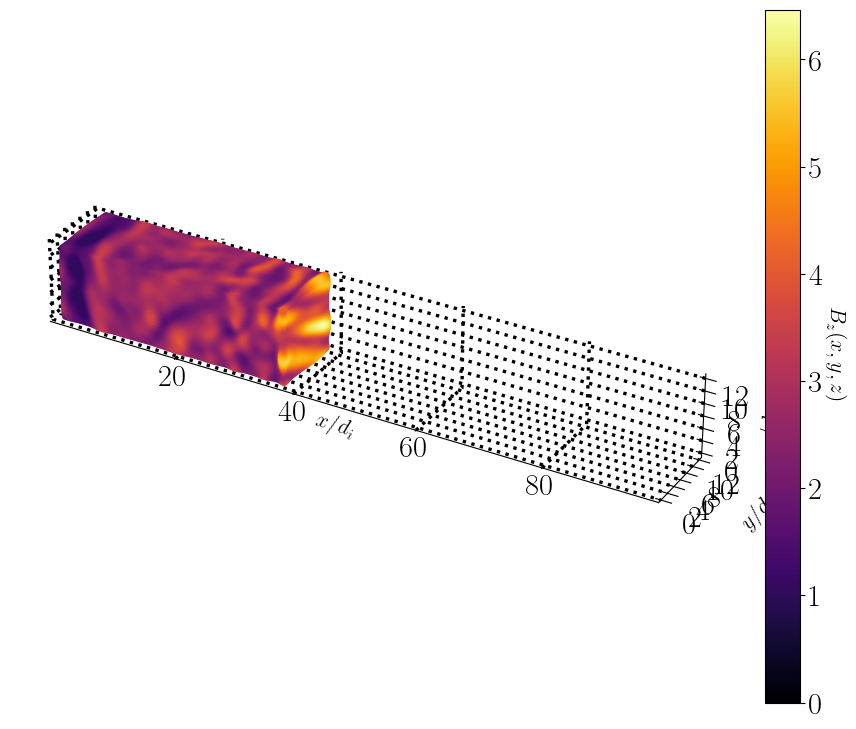

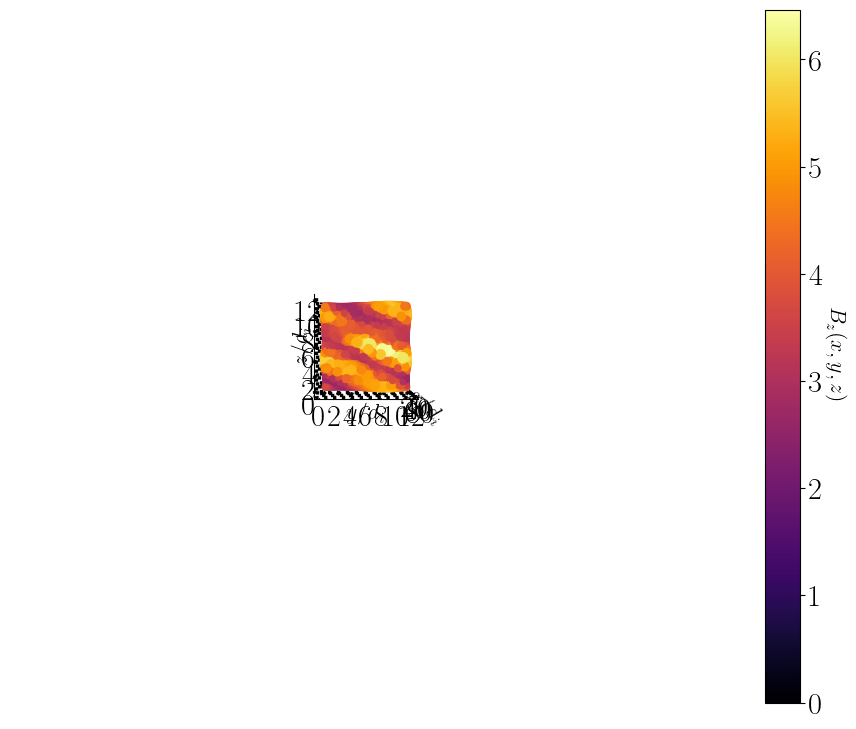

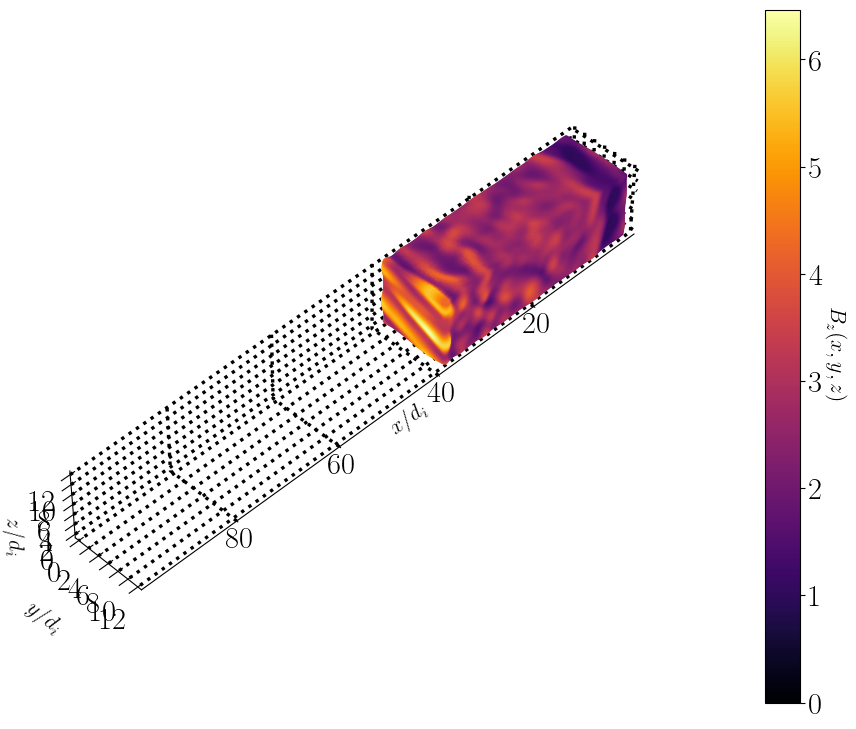

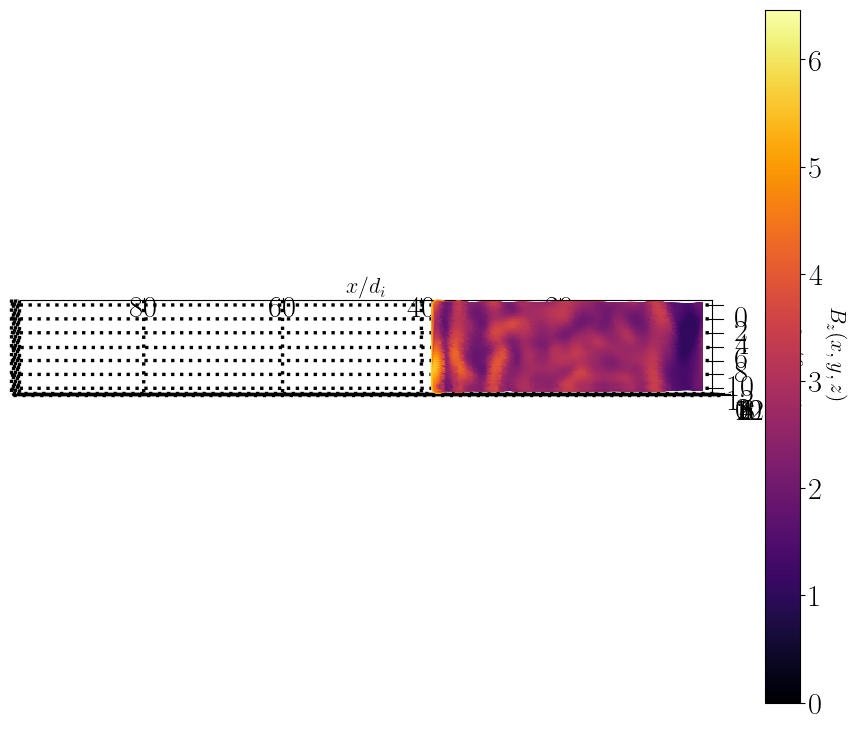

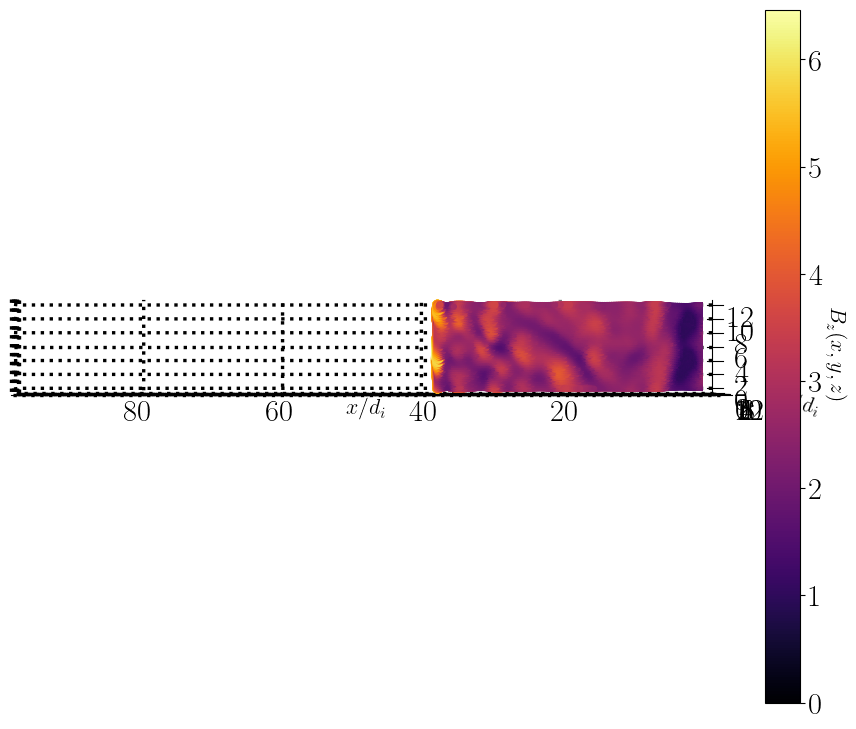

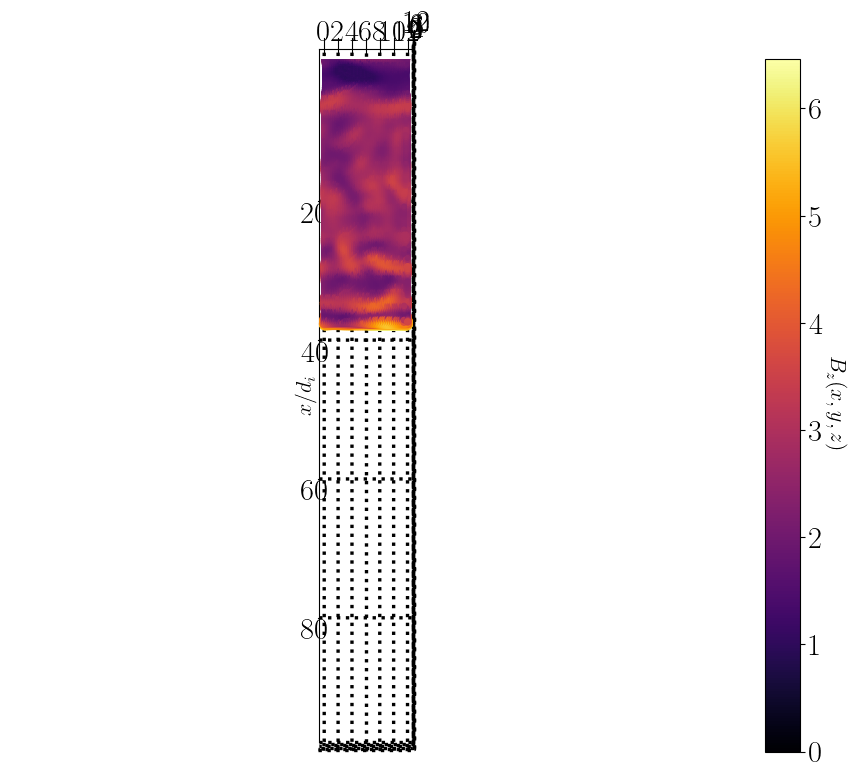

moving x axis label...
shrinking cbar...


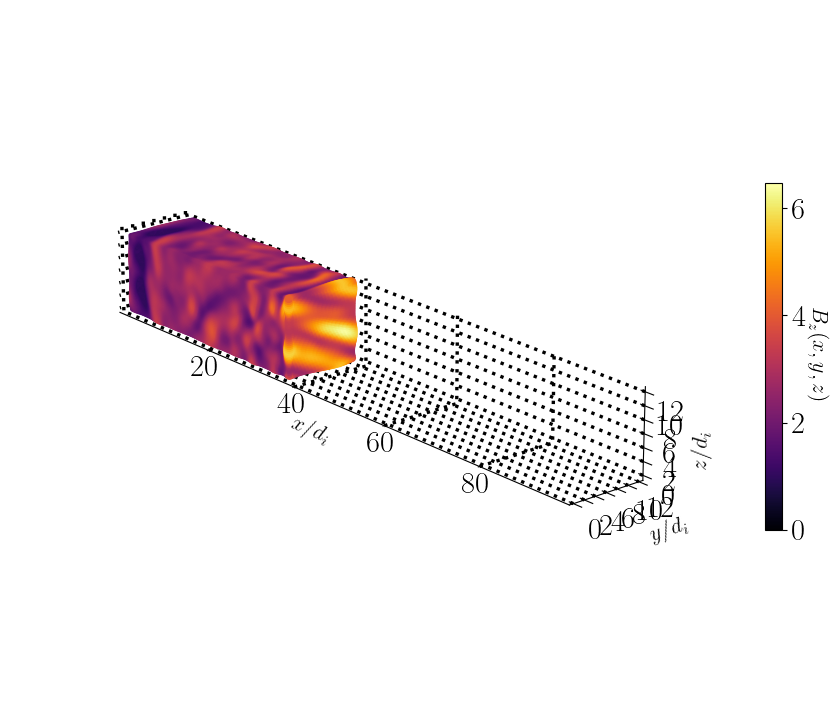

In [17]:
#Let's plot the fields in the the 3D!
#Note, we are in the simulation rest frame
#This is *like* (again we are in the sim frame here) Figure 3C of Juno et al 2023
#------------------------------------------

#This works by making a `scatter plot' of small balls whose size and color is propotional to it's value
#The higher the value, the bigger the ball

#The specific parameters used assumed in the function that fields have been normalized to there upstream value (so they are ~1-10 or so in value typically)

cutoffval = 1.0 #lower value to ignore when plotting. Indexes with dfield[fieldkey] < cutoff val will not be plotted 
cutofflocation = 38. #location to cutt off all data points with x>cutofflocation

smin = .15 #scale parameter related tot size of balls when plotting

fieldkey = 'bz'

viewangle = 'angle6'

#Note, I recommend editing the function above to get the ticks correct!
#3D plots require a lot of manual fine tuning to make them look nice!

for viewangle in  ['angle0','angle1','angle2','angle3','angle4','angle5','angle6']:
    flnm = ''
    plot_3d_fields(dfields,fieldkey,viewangle,flnm=flnm,cutoffval=cutoffval,cutofflocation=cutofflocation,smin = smin)